In [1]:
%matplotlib inline
# %config InlineBackend.figure_formats = ['svg', 'pdf']
# %config InlineBackend.rc = {'figure.dpi' : 96 }

In [2]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gs

from harissa_benchmark import Benchmark, available_networks, available_inferences
from harissa_benchmark.generators import InferencesGenerator
from harissa_benchmark.plotter import DirectedPlotter, UnDirectedPlotter
from harissa.plot import build_pos, plot_network

print(available_networks())
print(available_inferences())

['FN4', 'FN8', 'Trees5', 'Trees10', 'Trees20', 'Trees50', 'Trees100', 'BN8', 'CN5']
['Cardamom', 'Pearson', 'Genie3', 'Sincerities', 'Hartree']


In [3]:
gen = Benchmark(path='cardamom_benchmark')

# for name, network in gen.networks_generator.networks.items():
#     print(f'{name}:')
#     plot_network(network.interaction, build_pos(network.interaction))

In [4]:
gen.generate()

In [5]:
networks = dict(sorted(gen.generators[0].networks_generator.networks.items()))
networks = dict(filter(lambda n: n[0] in ['BN8', 'FN4', 'FN8', 'CN5'], networks.items()))

networks_pos = [
    build_pos(network.interaction) for network in networks.values()
]
scores = gen.scores
order = [
    'Hartree', 
    'Cardamom',
    'Genie3', 
    'Sincerities',
    # 'PIDC': (cmap(4), cmap(5)), 
    'Pearson',
    # 'SCRIBE_timed': (cmap(10), cmap(11)), 
    # 'SCRIBE_wadd': (cmap(12), cmap(13)),
    # 'SCRIBE_pseudotimed': (cmap(16), cmap(17)), 
    # 'Random': 2*('lightgray',)
]
# reordering
for key, value in scores.items():
    scores[key] = {k:value[k] for k in order}

In [6]:
def plot_figure(networks, networks_pos, scores, Plotter, show_networks=True):
    nb_networks = len(networks)
    nb_colum = 4 + show_networks
    scale = 5
    fig = plt.figure(figsize=(scale*nb_colum, scale*len(networks)))
    grid = gs.GridSpec(nb_networks, nb_colum)

    for i, (net_name, network) in enumerate(networks.items()):
        plotter = Plotter(network)
        j = 0
        if show_networks:
            ax = fig.add_subplot(grid[i, j])
            plot_network(
                network.interaction, 
                networks_pos[i],
                axes=ax,
                scale=scale*2
            )
            ax.set_ylabel(f'{net_name}')
            j = 1
        
        axs = [fig.add_subplot(grid[i, j+k]) for k in range(4)]

        sc = scores[net_name]
        plotter.plot_roc_curves(sc, axs[0])
        plotter.plot_roc_boxes(sc, axs[1])
        plotter.plot_pr_curves(sc, axs[2])
        plotter.plot_pr_boxes(sc, axs[3])

        if i < nb_networks - 1:
            for ax in axs:
                ax.set_xlabel('')

    return fig

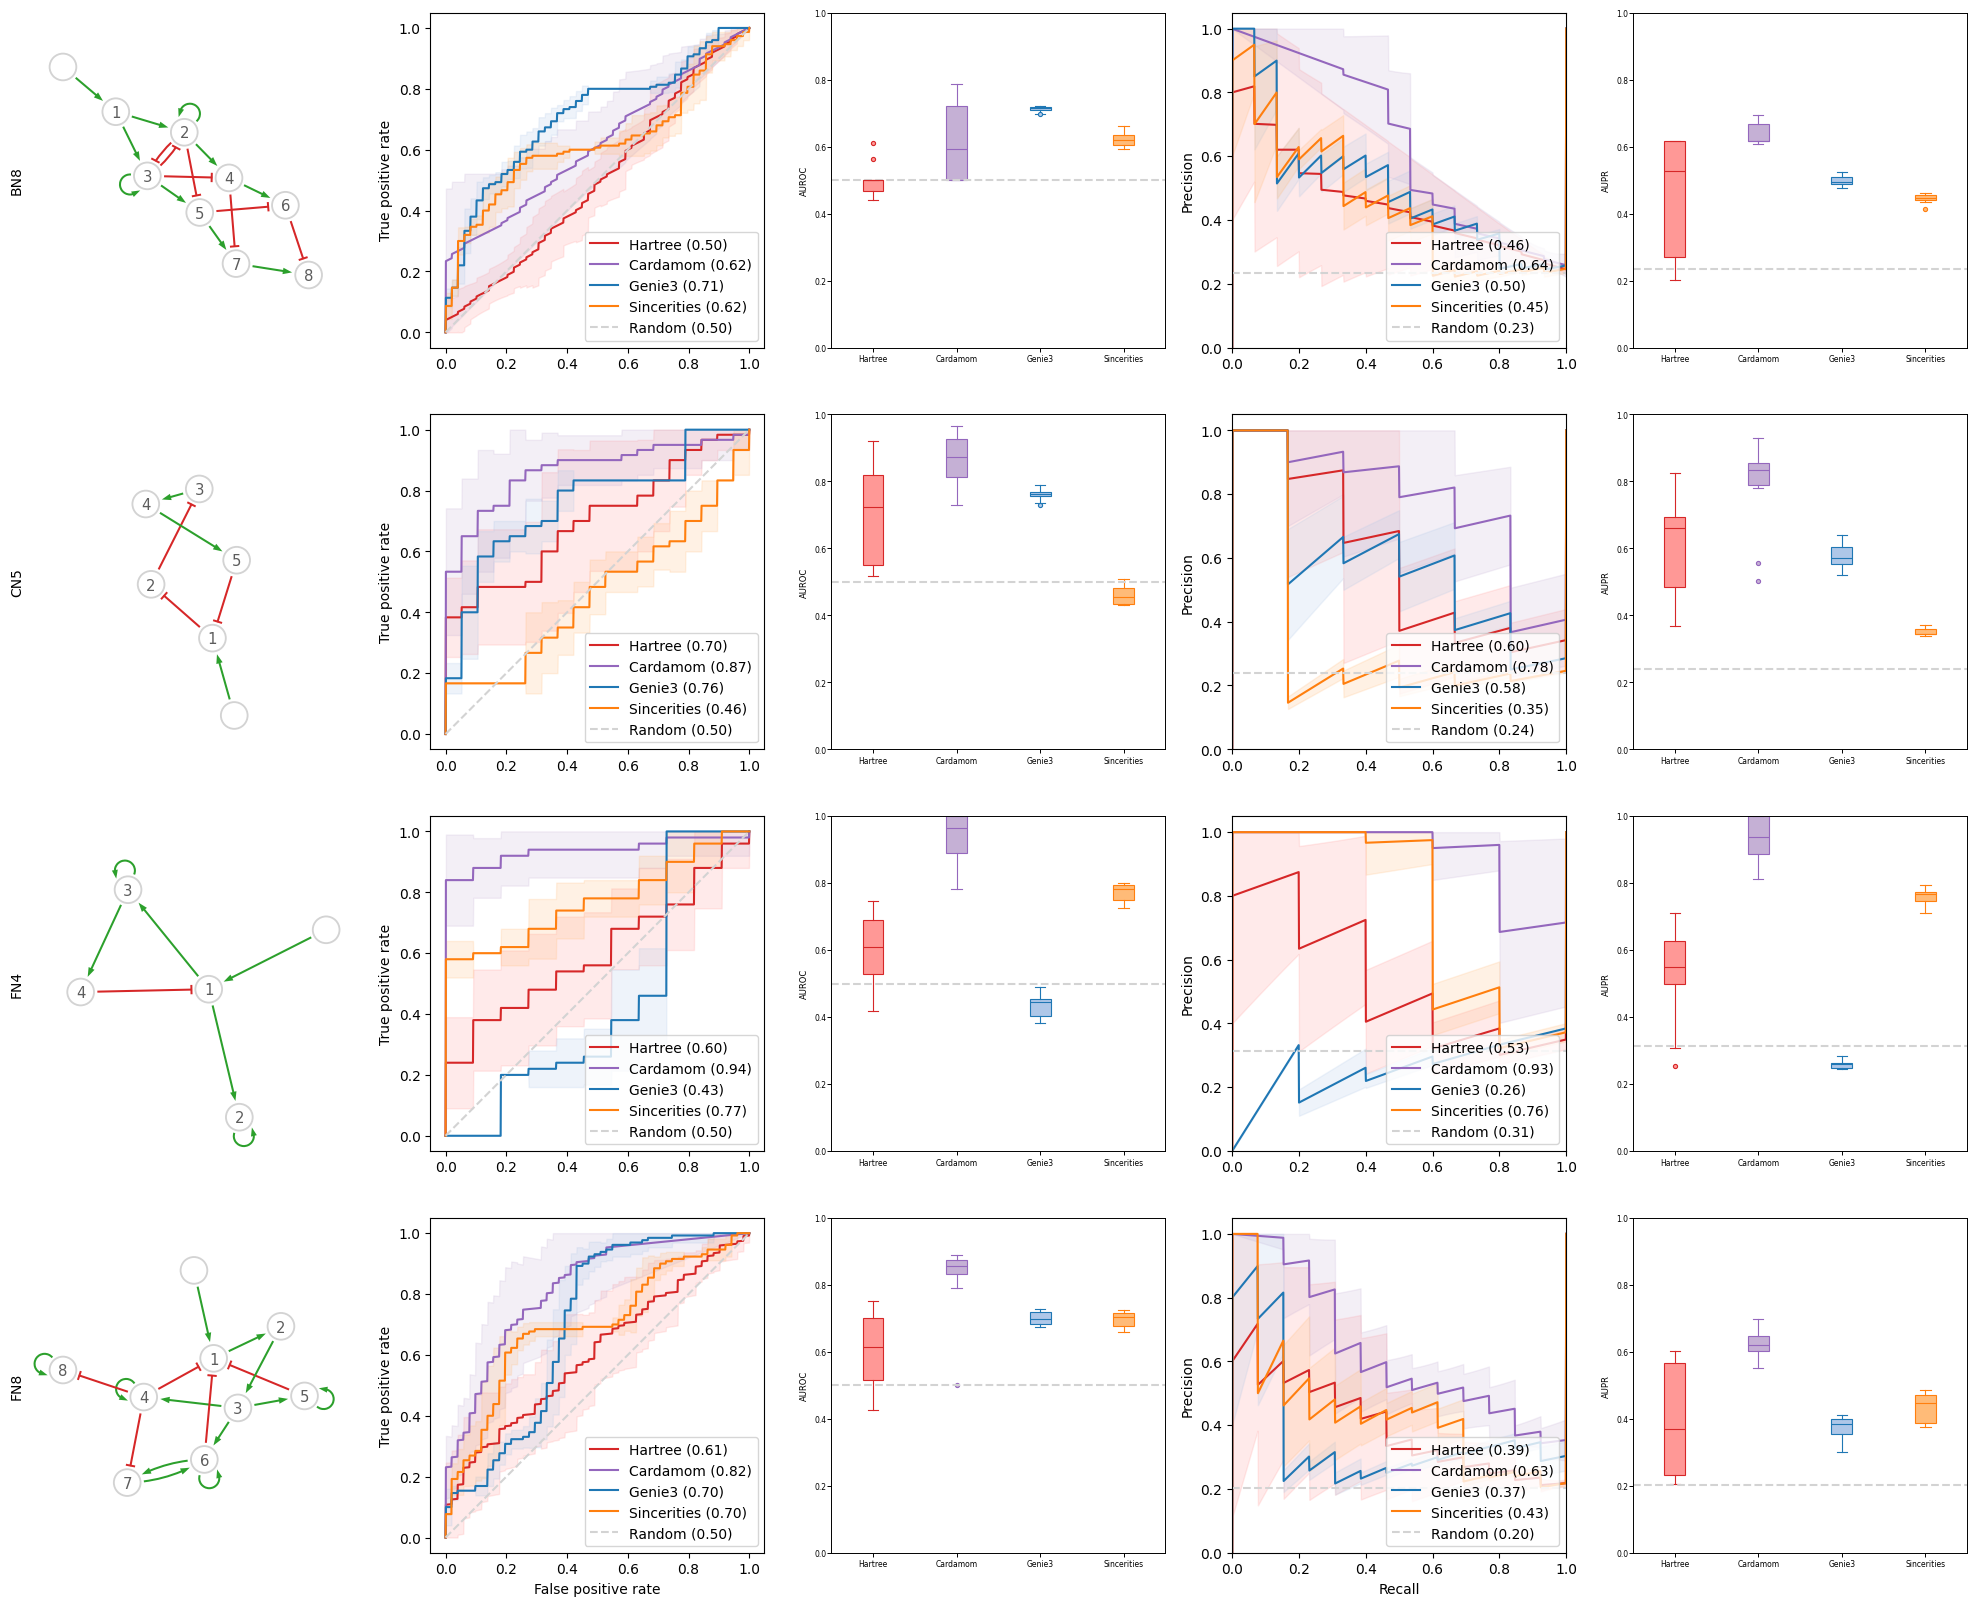

In [7]:
fig = plot_figure(networks, networks_pos, scores, DirectedPlotter)
fig.savefig('figure_directed.pdf')

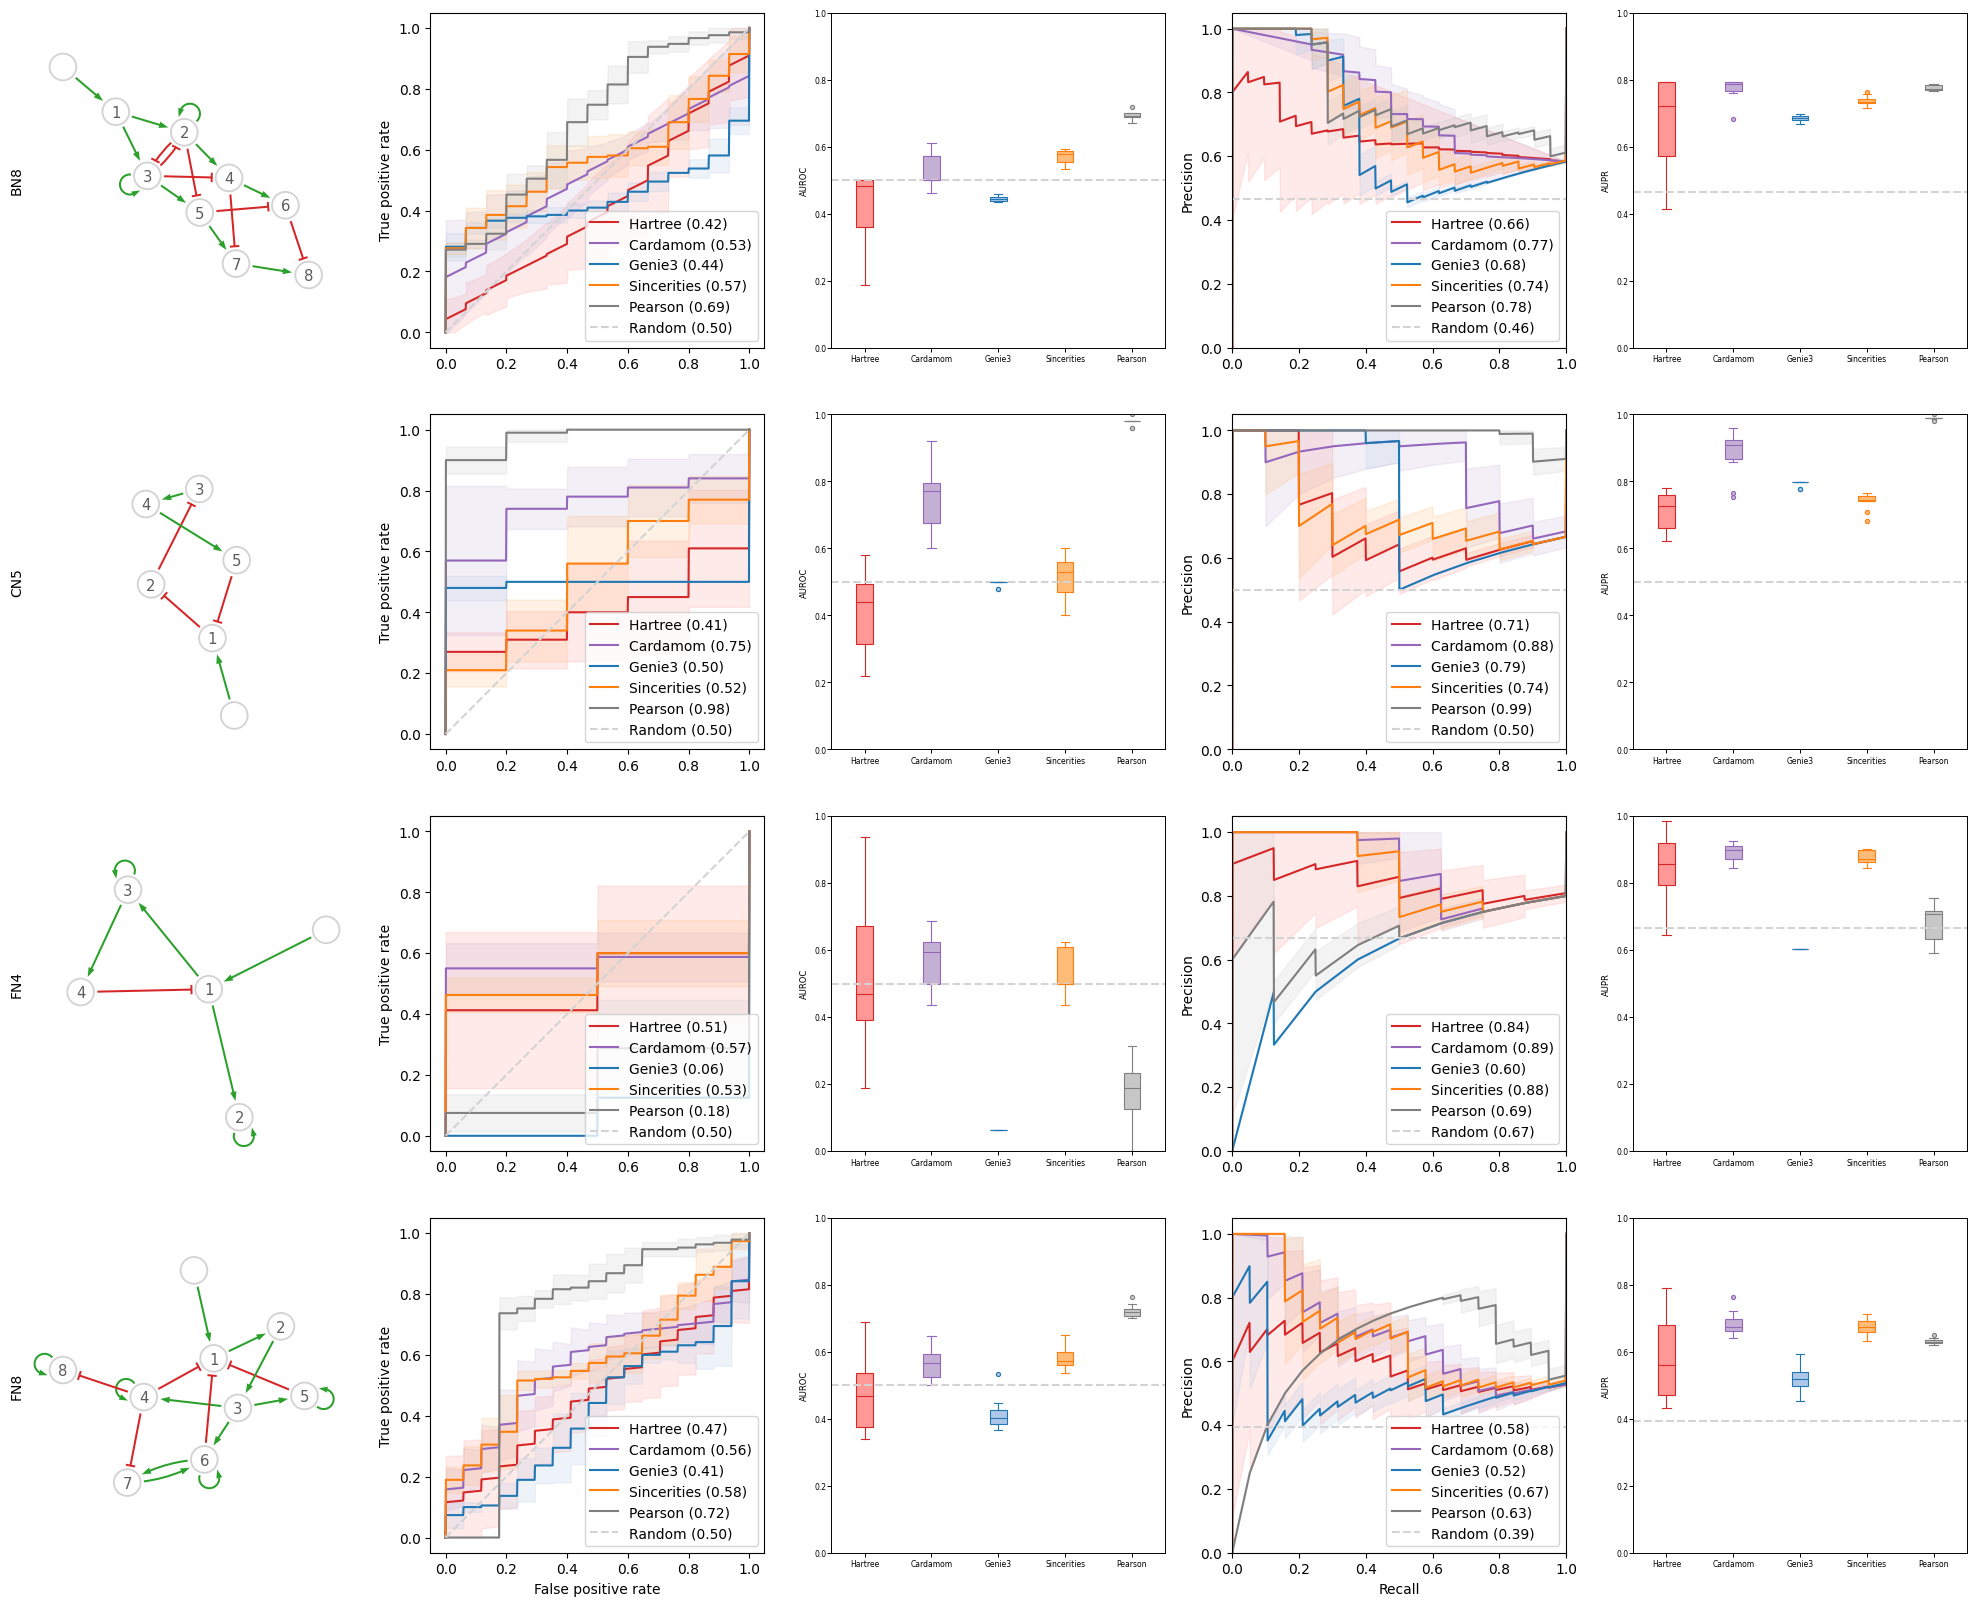

In [8]:
fig = plot_figure(networks, networks_pos, scores, UnDirectedPlotter)
fig.savefig('figure_undirected.pdf')

In [9]:
# gen.save('datagen3')